# Библиотеки Python для DS (семинары)
## Урок 1. Первичный и визуальный анализ данных

Домашние задание:    

Исследование данных о качестве вина (Wine Quality Dataset), используйте данные по белым и красным винам.    

1. Проведите первичный анализ данных: изучите типы переменных, наличие пропусков, статистические характеристики.

2. Визуализируйте распределение количественных переменных с помощью гистограмм и box plot.

3. Постройте столбчатые диаграммы для анализа распределения категориальных переменных.

4. Сделайте выводы о качестве данных и потенциальных взаимосвязях.

## Выполнение домашней работы

In [3]:
# Библиотеки для скачивания датасета
from pathlib import Path
import opendatasets as od

In [4]:
# Скачиваем датасет
dataset_path = Path('yasserh/wine-quality-dataset')
# Проверяем существование директории с датасетом
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/yasserh/wine-quality-dataset')

Skipping, found downloaded files in ".\wine-quality-dataset" (use force=True to force download)


1. Проведите первичный анализ данных: изучите типы переменных, наличие пропусков, статистические характеристики.

In [5]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [6]:
# Загружаем дата фрейм
df_wine = pd.read_csv('wine-quality-dataset/WineQT.csv')
# Выводим дата фрейм
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Этот фрейм данных содержит следующие столбцы:

Входные переменные (на основе физико-химических тестов):

1. fixed acidity (фиксированная кислотность)
2. volatile acidity (летучая кислотность)
3. citric acid (лимонная кислота)
4. residual sugar (остаточный сахар)
5. chlorides (хлориды)
6. free sulfur dioxide (свободный диоксид серы)
7. total sulfur dioxide (общий диоксид серы)
8. density (плотность)
9. рН
10. sulphates (сульфаты)
11. alcohol (спирт)
12. quality score between 0 and 10 (качество оценка от 0 до 10) — Выходная переменная (на основе сенсорных данных)
13. id (уникальный индефикатор вина)

In [7]:
# Выводим общую информацию
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
# Смотрим тип данных
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [9]:
# Определим непрерывные признаки
continuous_features = ['fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']

# Определим признаки, которые будут преобразованы в объектный тип данных
# features_to_convert = [feature for feature in df_wine.columns if feature not in continuous_features]
features_to_convert = ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'alcohol', 'quality']

# Определяем интервалы для категорий
bins = {
    'volatile acidity': [0.12, 0.39, 0.52, 0.64, 1.00, float('inf')],
    'residual sugar': [0.90, 1.90, 2.20, 2.60, 5.00, float('inf')],
    'free sulfur dioxide': [1, 7, 13, 21, 33, float('inf')],
    'alcohol': [8.40, 9.50, 10.20, 11.10, 12.00, float('inf')],
    'quality': [0.80, 3, 5, 6, 8, float('inf')]
}

# Определяем метки для категорий
labels = {
    'volatile acidity': ['0', '1', '2', '3', '4'],
    'residual sugar': ['0', '1', '2', '3', '4'],
    'free sulfur dioxide': ['0', '1', '2', '3', '4'],
    'alcohol': ['0', '1', '2', '3', '4'],
    'quality': ['0', '1', '2', '3', '4']
}

# Присваиваем категории
for feature in features_to_convert:
    if feature in bins:  # Проверяем, что признак есть в bins
        if len(bins[feature]) - 1 == len(labels[feature]):
            df_wine[feature] = pd.cut(df_wine[feature], bins[feature], labels=labels[feature], right=False)

# Преобразовываем признаки в объектный тип данных
for feature in features_to_convert:
    df_wine[features_to_convert] = df_wine[features_to_convert].astype('object')

In [10]:
# Проверяем тип данных после преобразования
df_wine.dtypes

fixed acidity           float64
volatile acidity         object
citric acid             float64
residual sugar           object
chlorides               float64
free sulfur dioxide      object
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                  object
Id                        int64
dtype: object

In [11]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000
Id,1143.0,804.969379,463.997116,0.00000,411.00000,794.00000,1209.500000,1597.00000


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. fixed acidity (фиксированная кислотность):
    * Средняя фиксированая кислотность на уровне 7.90
    * Миниманая 4.60
    * Максимальная 15.90
    * Медиана равна 8.31
    * Отклонение состовляет 1.74
2. citric acid (лимонная кислота):
    * Средние значение лимонной кислоты на уровне 0.25
    * Миниманая 0.00
    * Максимальная 1.00
    * Медиана равна 0.26
    * Отклонение состовляет 0.19
3. chlorides (хлориды):
    * Средние значение хлоридов на уровне 0.07
    * Миниманая 0.01
    * Максимальная 0.61
    * Медиана равна 0.08
    * Отклонение состовляет 0.04
4. total sulfur dioxide (общий диоксид серы):
    * Средние значение общих диоксидов серы на уровне 37.00
    * Миниманая 6.00
    * Максимальная 289.00
    * Медиана равна 45.91
    * Отклонение состовляет 32.78
5. density (плотность):
    * Средние значение плотности на уровне 0.99
    * Миниманая 0.99
    * Максимальная 1.00
    * Медиана равна 0.99
    * Отклонение состовляет 0.00
6. рН (рН):
    * Средние значение рН на уровне 3.31
    * Миниманая 2.74
    * Максимальная 4.01
    * Медиана равна 3.31
    * Отклонение состовляет 0.15
7. sulphates (сульфаты):
    * Средние значение сульфатов на уровне 0.62
    * Миниманая 0.33
    * Максимальная 2.00
    * Медиана равна 0.65
    * Отклонение состовляет 0.17

In [12]:
df_wine.describe(include='object').T

,count,unique,top,freq
volatile acidity,1143,5,1,298
residual sugar,1143,5,1,292
free sulfur dioxide,1143,5,2,302
alcohol,1143,5,1,358
quality,1143,4,3,605


На основе представленных статистических данных объектных признаков можно сделать следующие выводы:

1. olatile acidity (летучая кислотность):
    * Средняя летучая кислотность на уровне 0.52
    * Миниманая 0.12
    * Максимальная 1.58
    * Медиана равна 0.53
    * Отклонение состовляет 0.17
2. residual sugar (остаточный сахар):
    * Средние значение остаточного сахара на уровне 2.20
    * Миниманая 0.90
    * Максимальная 15.50
    * Медиана равна 2.53
    * Отклонение состовляет 1.35
3. free sulfur dioxide (свободный диоксид серы):
    * Средние значение свободных диоксидов серы на уровне 13.00
    * Миниманая 1.00
    * Максимальная 68.00
    * Медиана равна 15.61
    * Отклонение состовляет 10.25
4. alcohol (спирт):
    * Средние значение спирта на уровне 10.20
    * Миниманая 8.40
    * Максимальная 14.90
    * Медиана равна 10.44
    * Отклонение состовляет 1.08
5. quality score between 0 and 10 (качество оценка от 0 до 10) — Выходная переменная (на основе сенсорных данных):
    * Средние значение оценки качества на уровне 6.00
    * Миниманая 3.00
    * Максимальная 8.00
    * Медиана равна 5.65
    * Отклонение состовляет 0.80

2. Визуализируйте распределение количественных переменных с помощью гистограмм и box plot.

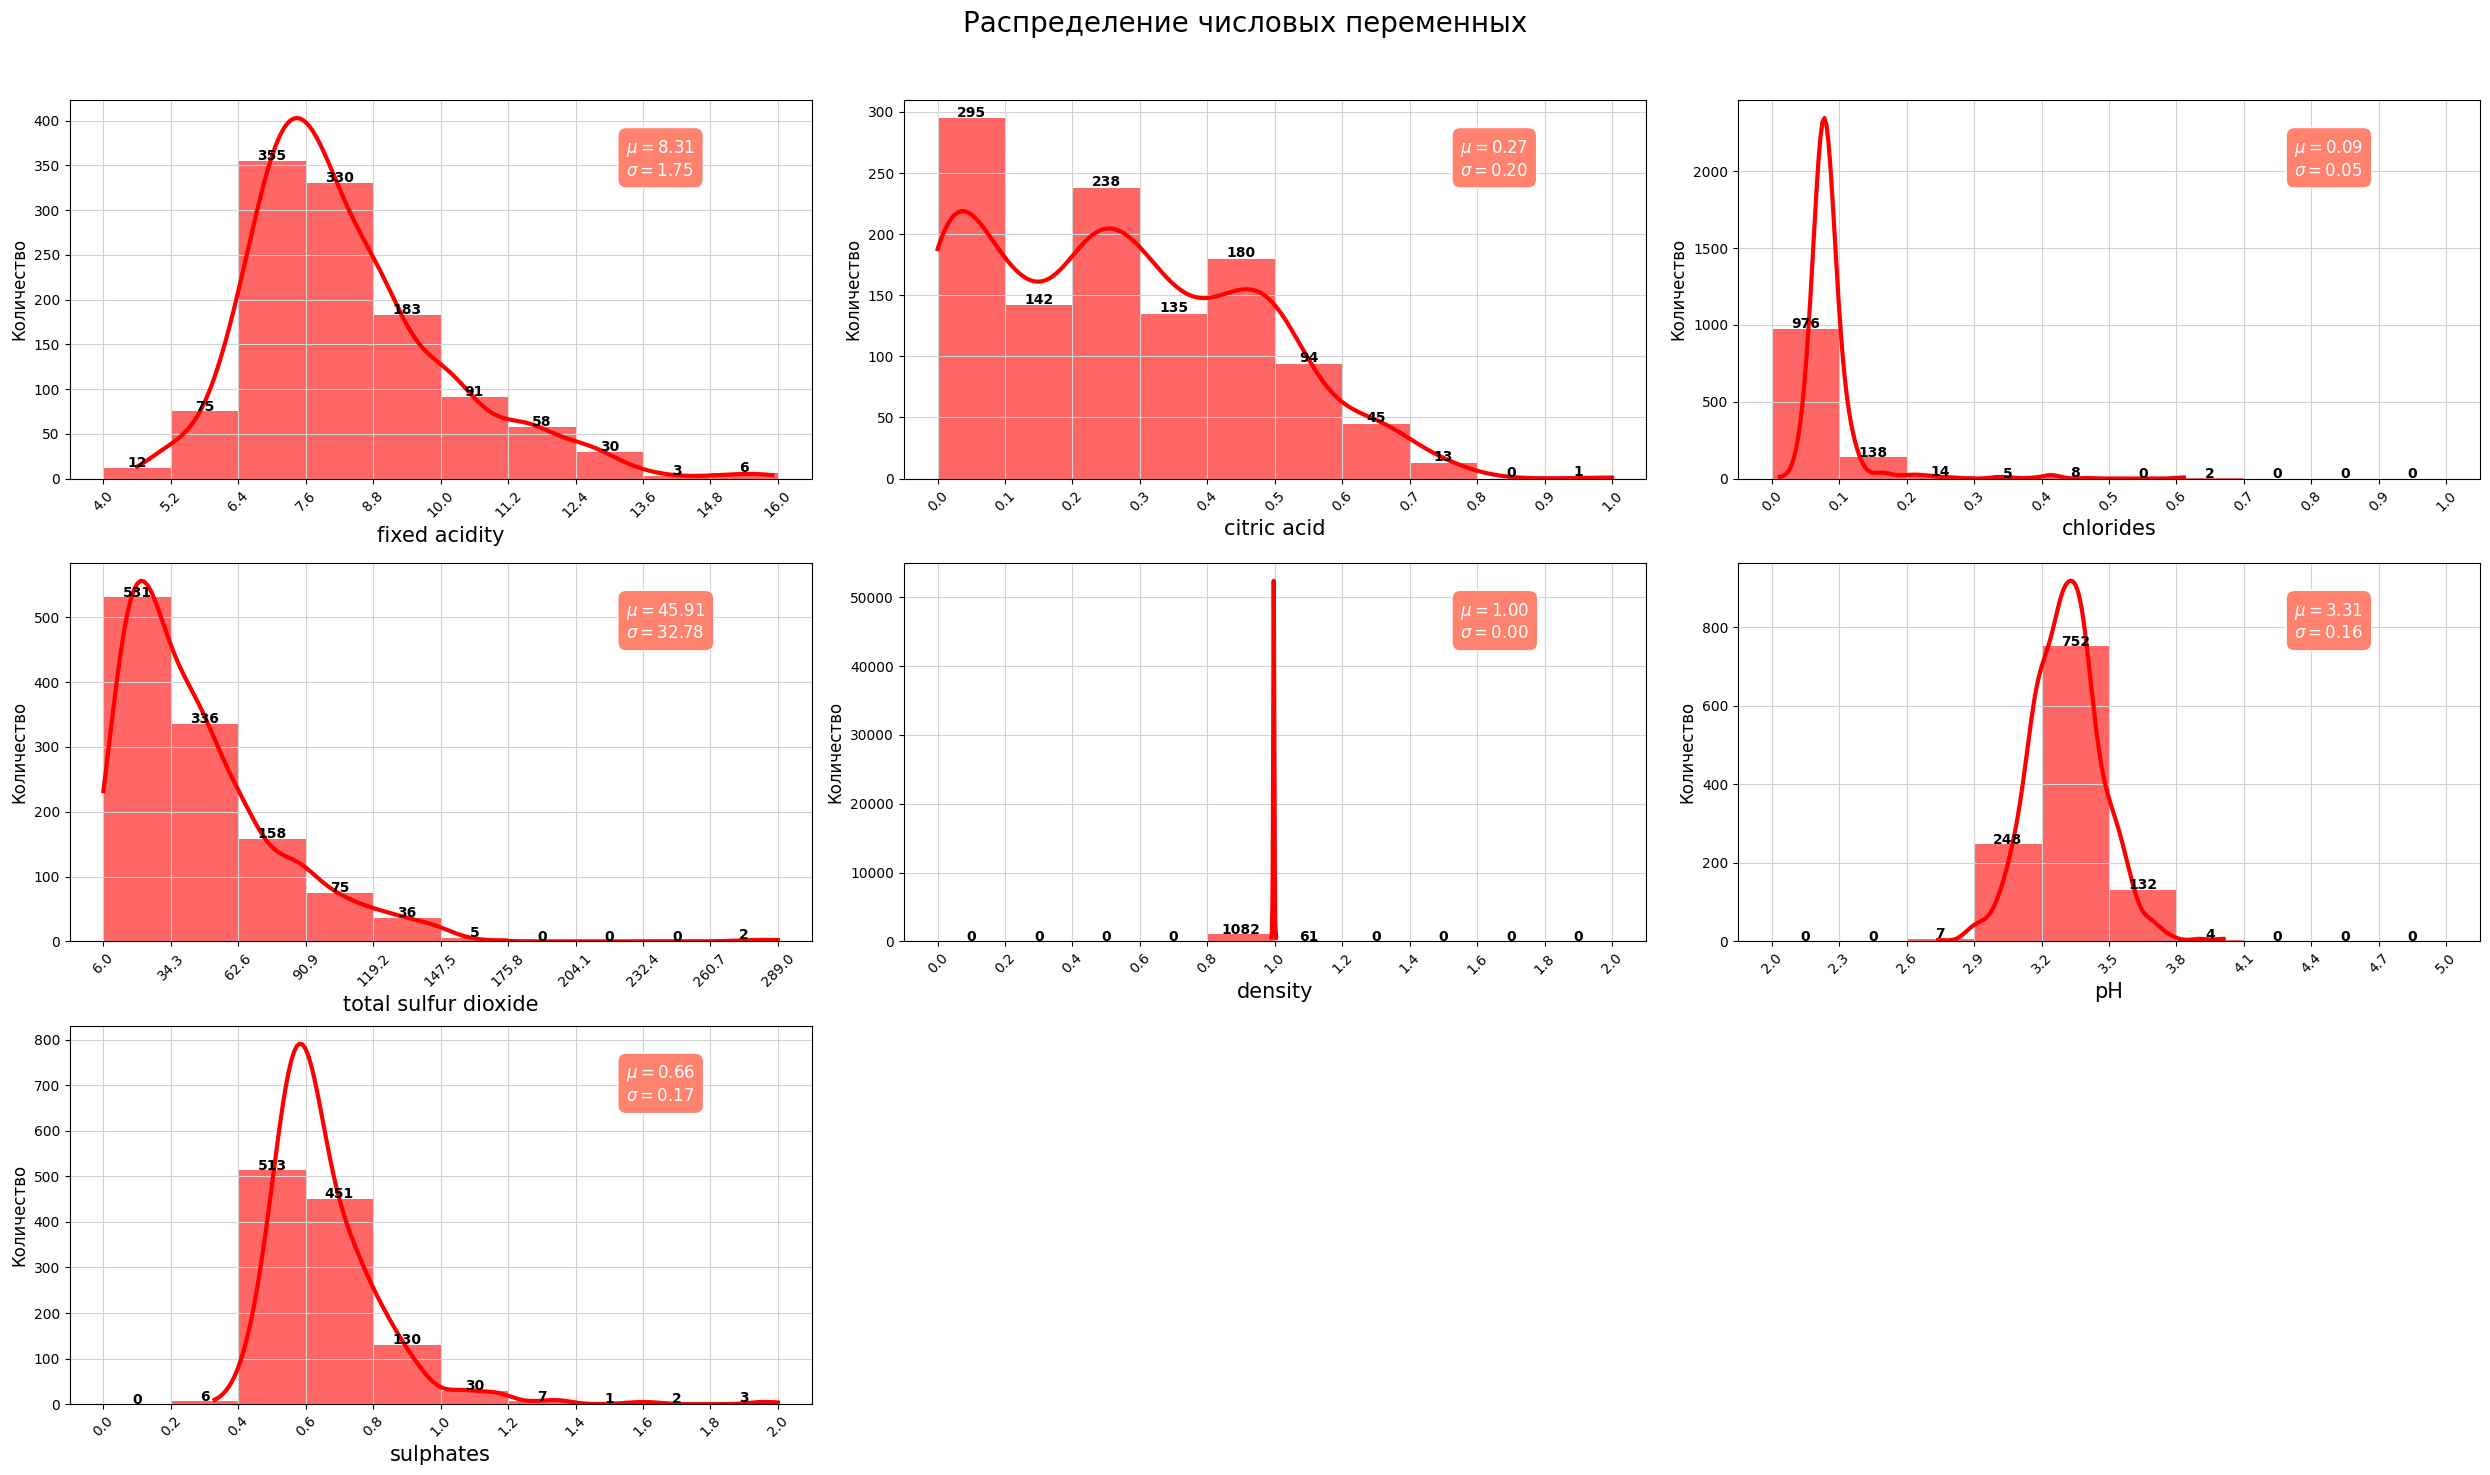

In [13]:
# Выбираем признаки
df_continuous = df_wine[continuous_features]

# Cоздает окно с графиками, разбитым на 2 строки и 3 столбца (7 графиков всего). Размер окна - 15 дюймов в ширину и 10 дюймов в высоту.
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))

# Плоская форма массива ax для удобства индексации
axs = ax.flatten()

# Цикл для построения гистограмм для каждого числового признака
# for i in range(len(axs)):
#     col = df_continuous.columns[i]
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3

# Строим гистограмму
    values, bin_edges = np.histogram(df_continuous[col],
        bins=10, range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=axs[i],
            edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})

    axs[i].set_xlabel(col, fontsize=15)
    axs[i].set_ylabel('Количество', fontsize=12)
    axs[i].set_xticks(np.round(bin_edges, 1))
    axs[i].set_xticklabels(axs[i].get_xticks(), rotation=45)
    axs[i].grid(color='lightgrey')

    for j, p in enumerate(axs[i].patches):
        axs[i].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    axs[i].text(0.75, 0.9, textstr, transform=axs[i].transAxes, fontsize=12, verticalalignment='top',
            color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Проверка и отключение пустых подграфиков
for i in range(len(ax.flat)):
    if i >= len(df_continuous.columns):
# Отключаем оси для оставшихся подграфиков, если они не используются
        ax.flat[i].axis('off')  

plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

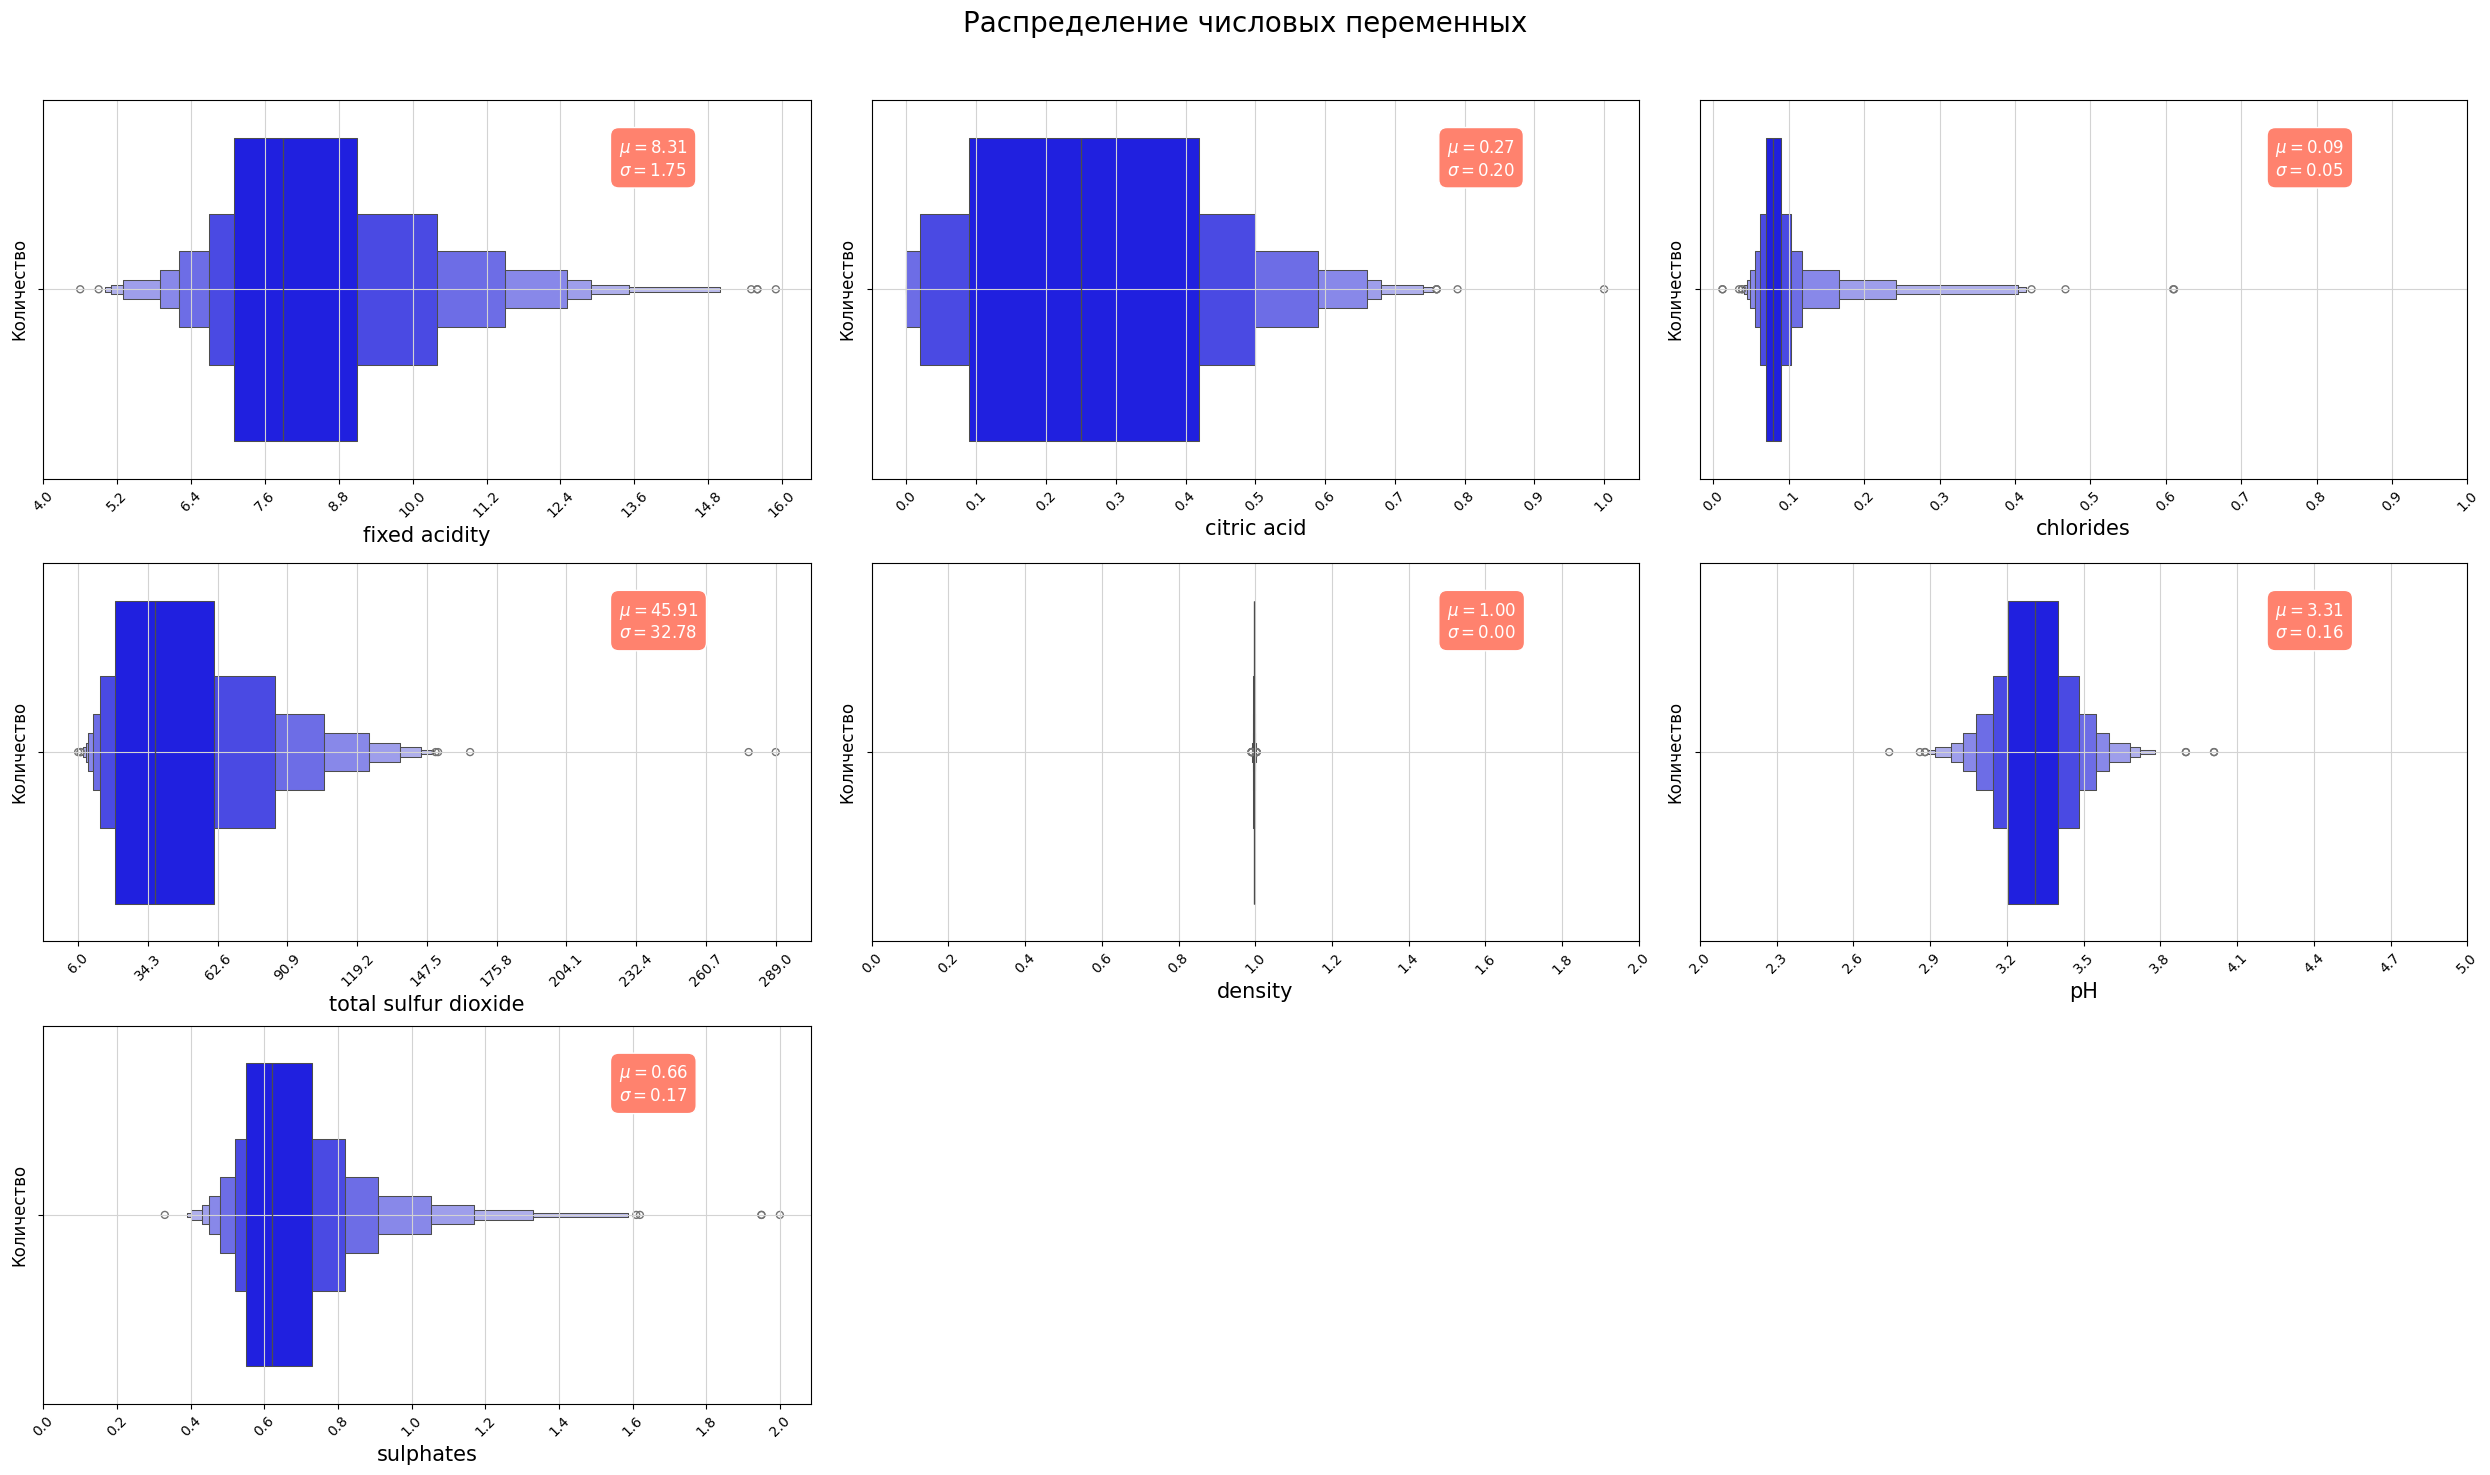

In [14]:
# Cоздает окно с графиками, разбитым на 3 строки и 3 столбца (7 графиков всего). Размер окна - 15 дюймов в ширину и 10 дюймов в высоту.
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    
# Строим гистограмму
    values, bin_edges = np.histogram(df_continuous[col],
            range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.boxenplot(data=df_continuous, x=col, ax=ax[x, y],
            color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

# Добавление среднего значения и стандартного отклонения
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))

    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
            color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Проверка и отключение пустых подграфиков
for i in range(len(ax.flat)):
    if i >= len(df_continuous.columns):
# Отключаем оси для оставшихся подграфиков, если они не используются
        ax.flat[i].axis('off')  

plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

3. Постройте столбчатые диаграммы для анализа распределения категориальных переменных.

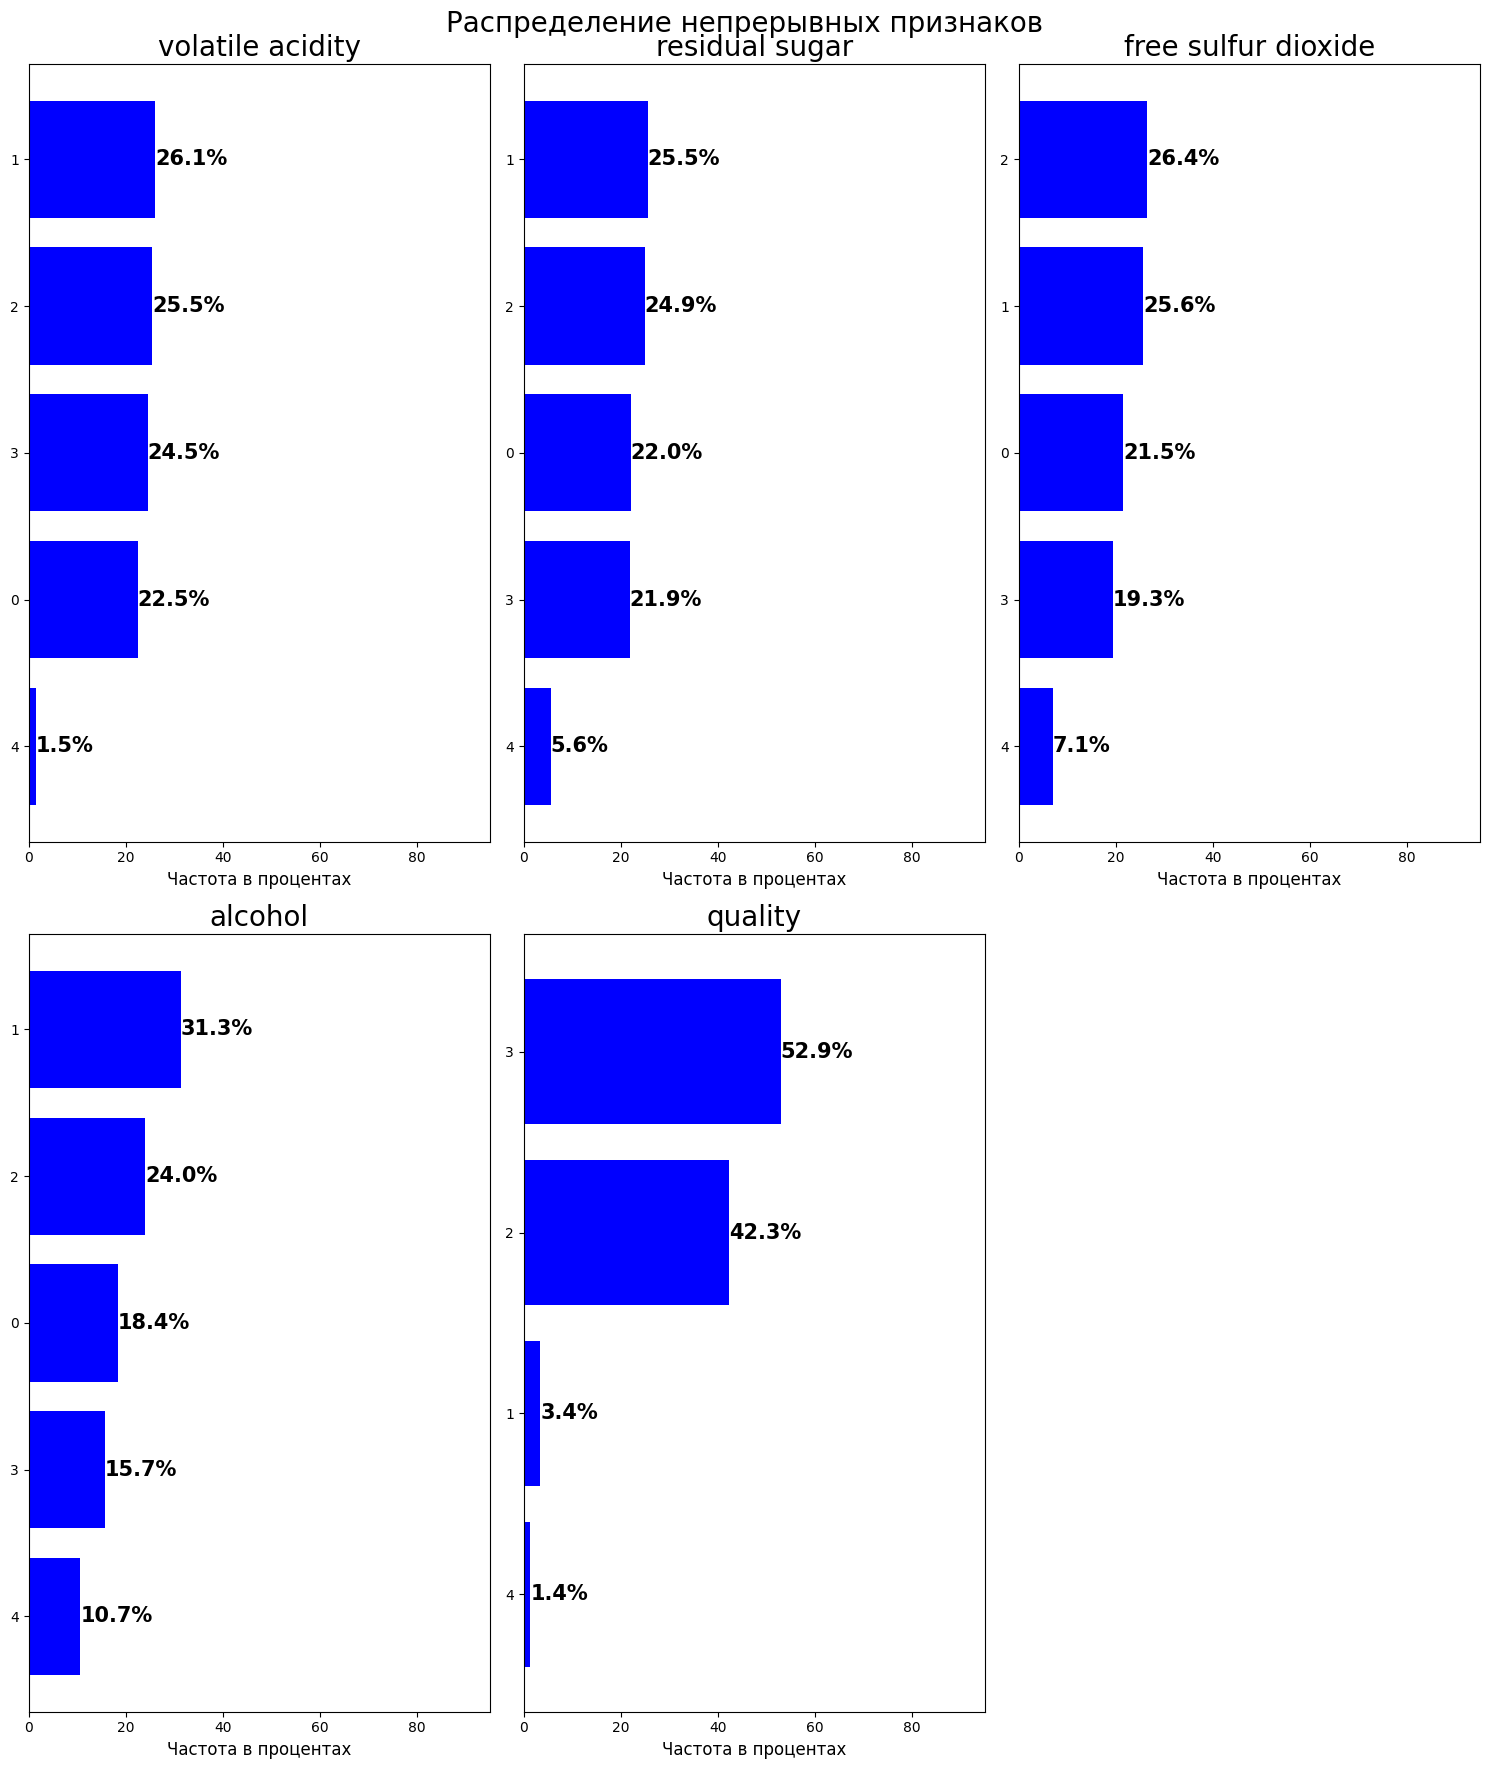

In [15]:
categorical_features = df_wine.columns.difference(continuous_features)

categorical_features = categorical_features[categorical_features != 'Id']

# Количество строк и столбцов для подграфиков
n_features = len(categorical_features)
ncols = 3
nrows = (n_features + ncols - 1) // ncols  # Округляем вверх

# Cоздает окно с графиками, разбитым на 2 строки и 3 столбца (12 графиков всего). Размер окна - 15 дюймов в ширину и 10 дюймов в высоту.
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 18))
# Плоская форма массива ax для удобства индексации
ax = axs.flatten()

# Сортировка категориальных признаков по порядку столбцов
categorical_features = sorted(categorical_features, key=lambda x: df_wine.columns.get_loc(x))

for i, col in enumerate(categorical_features):
    row = i // 3
    col_idx = i % 3

# Вычисление процентных значений частоты
    value_counts = df_wine[col].value_counts(normalize=True).mul(100).sort_values()

# Построение гистограммы
    value_counts.plot(kind='barh', ax=ax[row * ncols + col_idx], width=0.8, color='blue')

# Добавим процентные значения частоты к столбцам
    for index, value in enumerate(value_counts):
        ax[row * ncols + col_idx].text(value, index, f'{round(value, 1)}%', fontsize=15, weight='bold', va='center')

    ax[row * ncols + col_idx].set_xlim([0, 95])
    ax[row * ncols + col_idx].set_xlabel('Частота в процентах', fontsize=12)
    ax[row * ncols + col_idx].set_title(col.replace('_category', ''), fontsize=20)

# Отключение пустых подграфиков
for i in range(len(categorical_features), len(ax)):
    ax[i].axis('off')  # Отключаем оси для оставшихся подграфиков, если они не используются

plt.suptitle('Распределение непрерывных признаков', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()      

Двумерный анализ количественных признаков

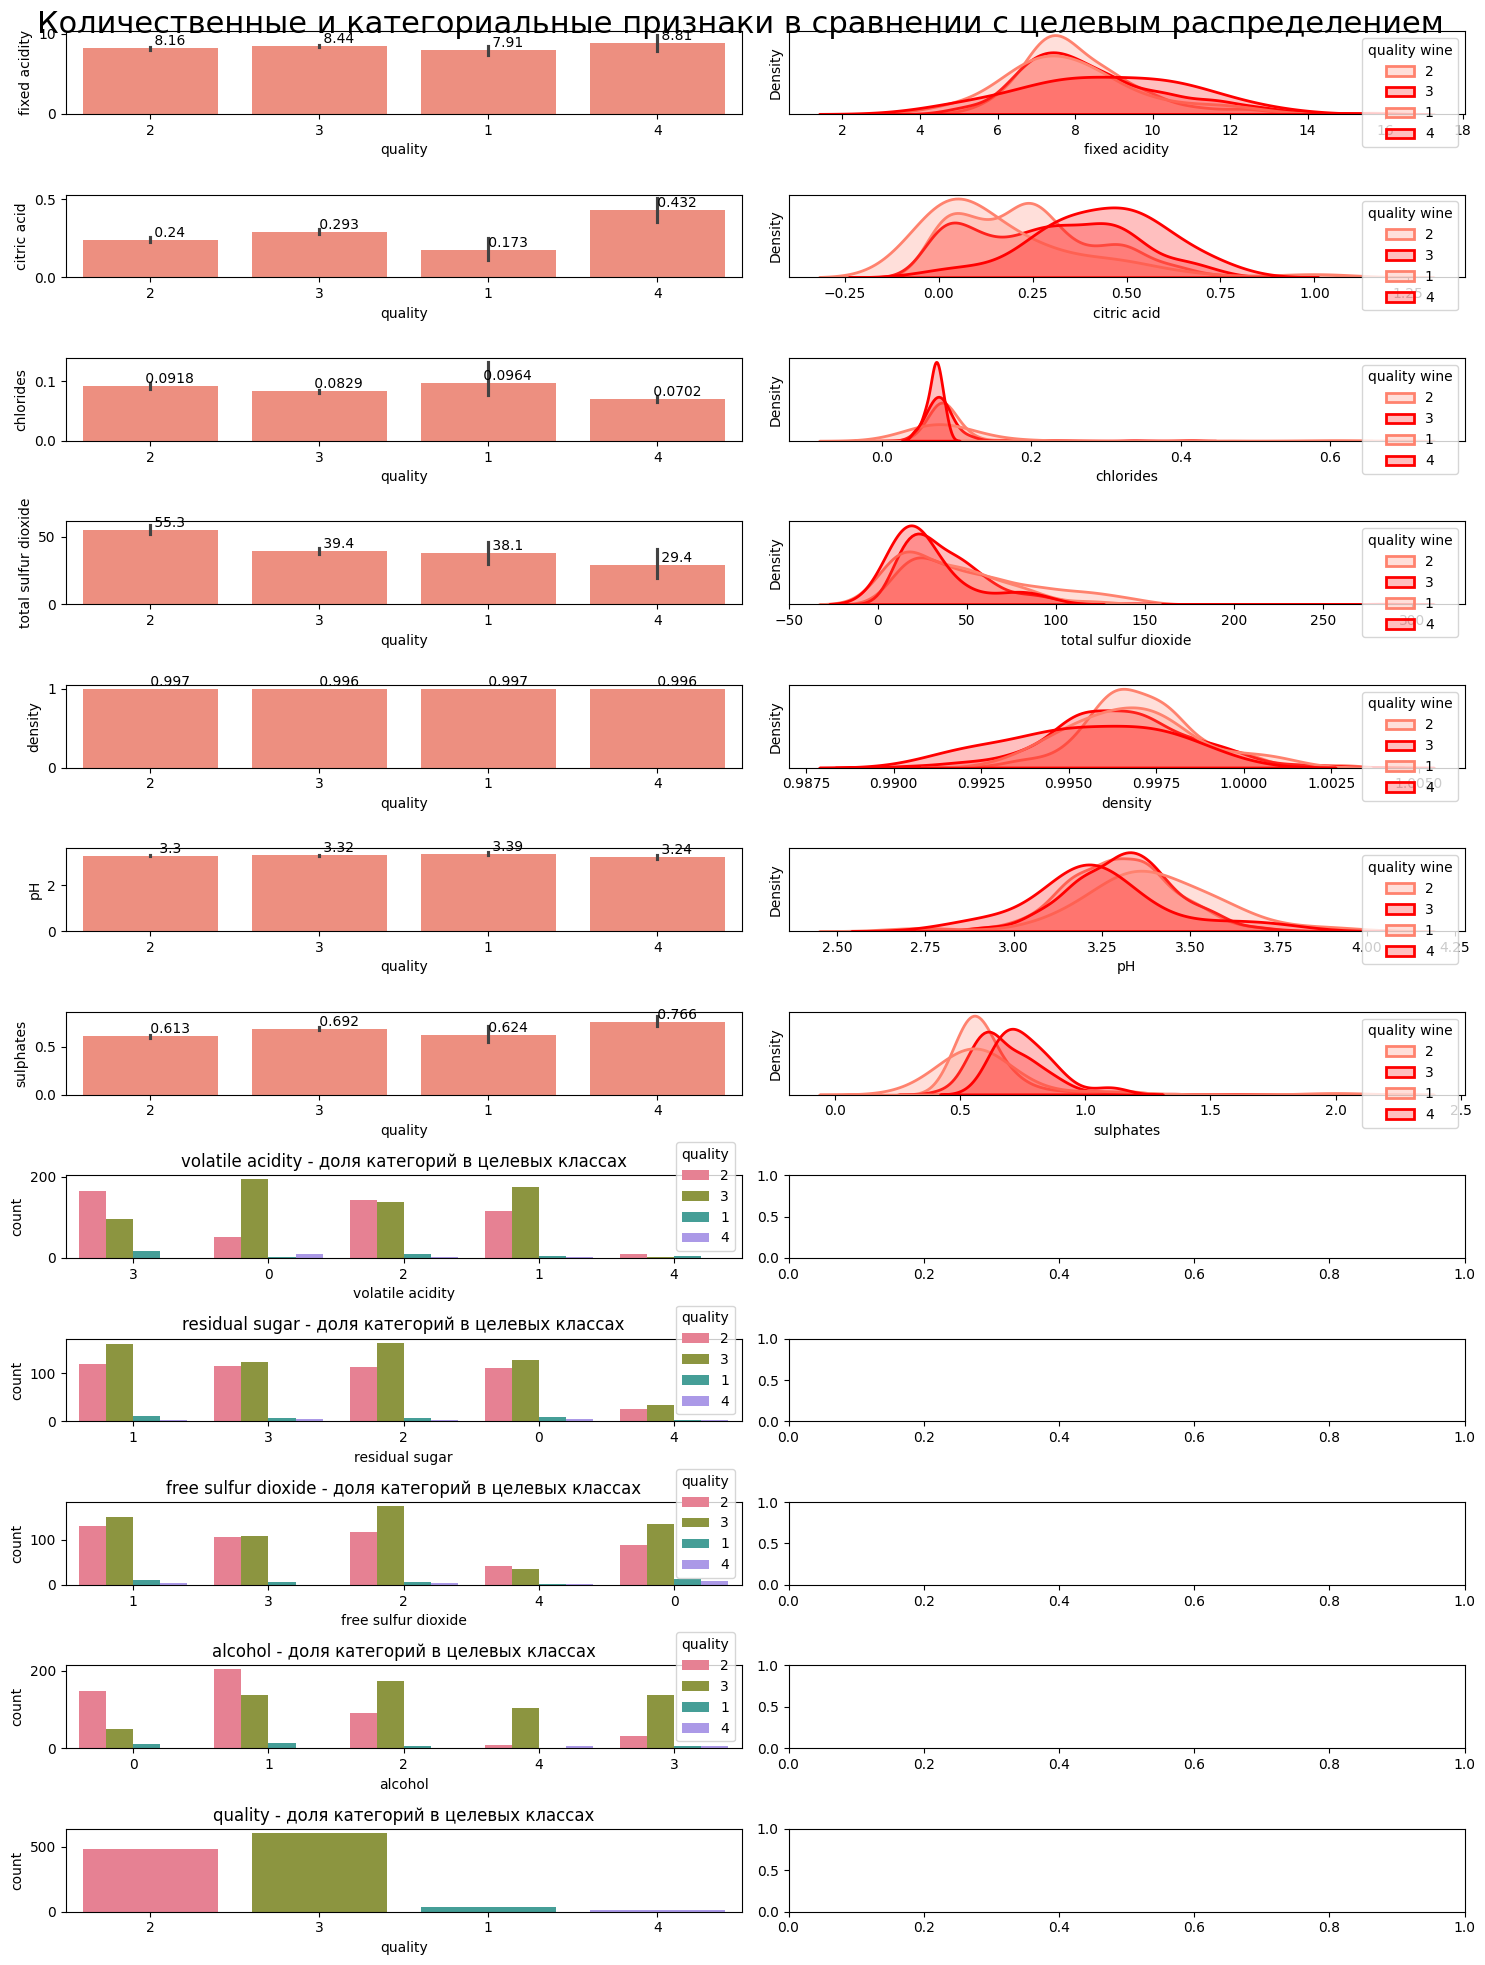

In [16]:
# Список непрерывных переменных
continuous_features = ['fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']

# Список категориальных переменных
categorical_features = ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'alcohol', 'quality']

# Устанавливаем палитру цветов
sns.set_palette(['#ff826e', 'red'])

# Создаем фигуру и подложку для графиков
fig, ax = plt.subplots(len(continuous_features) + len(categorical_features), 2, figsize=(15, 20), gridspec_kw={'height_ratios': [1] * (len(continuous_features) + len(categorical_features))})

# Цикл для каждого численного признака для создания линейчатых диаграмм и графиков kde
for i, col in enumerate(continuous_features):
# Гистограмма, показывающая среднее значение признака для каждой целевой категории
    graph = sns.barplot(data=df_wine, x="quality", y=col, ax=ax[i,0])

# График KDE, показывающий распределение признака для каждой целевой категории
    for quality in df_wine['quality'].unique():
        sns.kdeplot(data=df_wine[df_wine["quality"]==quality], x=col, fill=True, linewidth=2, ax=ax[i,1], label=quality)
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='quality wine', loc='upper right')

# Средние значения в гистограмму
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Цикл для каждого категориального признака для создания гистограмм со 100-процентным распределением
for i, col in enumerate(categorical_features):
    # Гистограмма со 100-процентным распределением, показывающая долю каждой категории в целевых классах
    sns.countplot(data=df_wine, x=col, hue="quality", ax=ax[len(continuous_features) + i, 0])
    ax[len(continuous_features) + i, 0].set_title(f'{col} - доля категорий в целевых классах')

# Устанавливаем заголовок для всей фигуры
plt.suptitle('Количественные и категориальные признаки в сравнении с целевым распределением', fontsize=22)

# Устанавливаем отступы между графиками
plt.tight_layout()

# Отображаем фигуру
plt.show()

Двумерный анализ для категориальных признаков

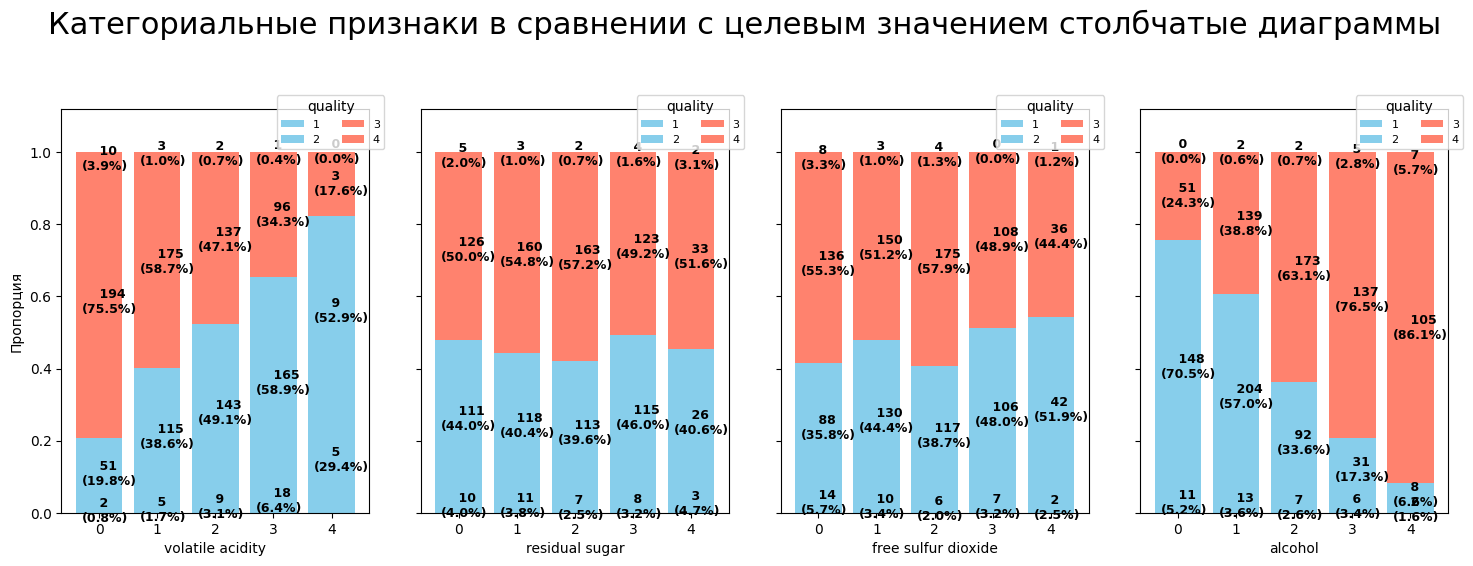

In [17]:
# Проверим размер списка категориальных признаков
categorical_features = [feature for feature in categorical_features if feature != 'quality']

nrows = 2
ncols = 4

# Если количество категориальных признаков меньше 8, то уменьшаем количество подграфиков
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10))

# Вычисляем, сколько подграфиков нужно использовать
num_plots = len(categorical_features)

for i, col in enumerate(categorical_features):
# Создадим перекрестную таблицу для каждой категории объекта
    cross_tab = pd.crosstab(index=df_wine[col], columns=df_wine['quality'])

# Использование аргумента normalize=True дает нам соотношение данных по индексу    
    cross_tab_prop = pd.crosstab(index=df_wine[col], columns=df_wine['quality'], normalize='index')

# Определение цветовой карты    
    cmp = ListedColormap(['skyblue', '#ff826e'])
    
    # # Построение многослойных столбчатых диаграмм, находим позицию подграфика
    x, y = i // ncols, i % ncols
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
            legend=False, ylabel='Пропорция', sharey=True)
    
    # Добавим пропорции и количество отдельных бинов к нашему графику, добавление значений на график
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                         s=f'    {count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=9, fontweight="bold")
    
    ax[x, y].legend(title='quality', loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[x, y].set_ylim([0, 1.12])
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)

# Удалим лишние пустые подграфики
for j in range(num_plots, nrows * ncols):
    fig.delaxes(ax.flatten()[j])

plt.suptitle('Категориальные признаки в сравнении с целевым значением столбчатые диаграммы', fontsize=22)
# Корректируем пространство для заголовка
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

4. Сделайте выводы о качестве данных и потенциальных взаимосвязях.    

* Данные не содержат дубликатов, пропущенных значений, что является положительным фактором для анализа.

* Данные ограничены в информации, такие как: год сбора урожая винограда, год выпуска бутылки вина, страна производства вина.

* Качество вина: Признак "quality" варьируется от 3 до 8, что говорит о том, что в наборе данных присутствуют как более низкокачественные, так и более качественные вина. Качество, вероятно, зависит от сочетания факторов, таких как кислотность, сахар, сульфаты и содержание алкоголя.

* Плотность вина: Плотность вина в диапазоне от 0.9968 до 0.9980 указывает на то, что вина не сильно отличаются по этому показателю.

* Алкоголь и качество: Видно, что вино с более высоким содержанием алкоголя (например, 9.8% или выше) имеет тенденцию к более высокому качеству (например, 6 или выше).

* Свободный и общий диоксид серы: Более высокие уровни диоксида серы могут быть связаны с сохранностью вина и его качеством. Однако слишком высокие значения могут указывать на избыточное использование консервантов.

* Кислотность и качество: Вина с более низкой летучей кислотностью (например, 0.28) могут быть лучше по качеству, чем вина с более высокой кислотностью, что может влиять на вкус.